# Introduccion


En el siguiente proyecto se realizara un analisis sobre las diferentes compañias de taxis en la ciudad de Chicago asi como los viajes que estas realizaron a los diferentes barrios de la ciudad durante el mes de noviembre de 2017, ademas se analizara el numero de viajes realizados entre el 15 y 26 de noviembre. 

# Importacion de Datos y Librerias 

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, levene

In [2]:
project_01 = pd.read_csv('/datasets/project_sql_result_01.csv')
project_04 = pd.read_csv('/datasets/project_sql_result_04.csv')
project_07 = pd.read_csv('/datasets/project_sql_result_07.csv')

In [3]:
display(project_01.info())
display(project_01.head())
project_01.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


None

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


Se puede observar que el conteo de archivos es de 64 y que la media es 2145.48. A partir de aqui se revisará valores duplicados ya que a simple vista no existen valores NaN.

# VERIFICACION DE DUPLICADOS 

In [4]:
# Buscar valores duplicados
duplicates = project_01.duplicated()

# Mostrar las filas duplicadas
display("Filas duplicadas:")
display(project_01[duplicates])

# Eliminar los valores duplicados y actualizar el DataFrame
project_01_sin_duplicados = project_01.drop_duplicates()

# Verificar el nuevo DataFrame sin duplicados
display("DataFrame sin duplicados:")
display(project_01_sin_duplicados)


'Filas duplicadas:'

,company_name,trips_amount


'DataFrame sin duplicados:'

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


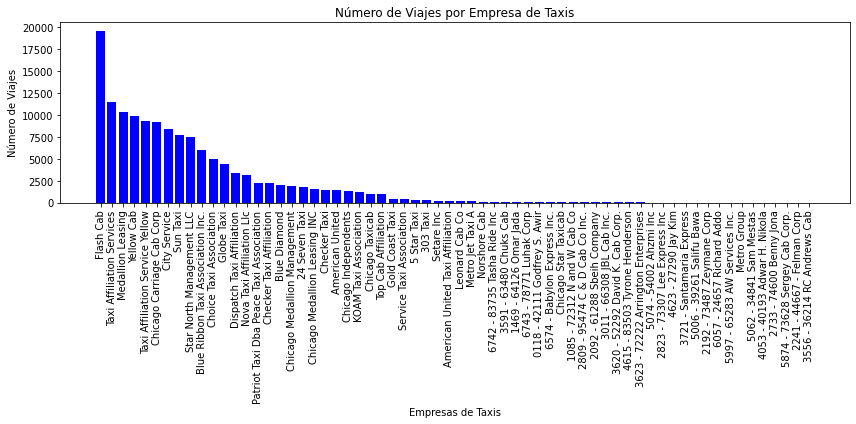

In [5]:
company_names = project_01['company_name']
trips_amount = project_01['trips_amount']

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(company_names, trips_amount, color='blue')
plt.xlabel('Empresas de Taxis')
plt.ylabel('Número de Viajes')
plt.title('Número de Viajes por Empresa de Taxis')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor claridad
plt.tight_layout()

# Mostrar el gráfico
plt.show()


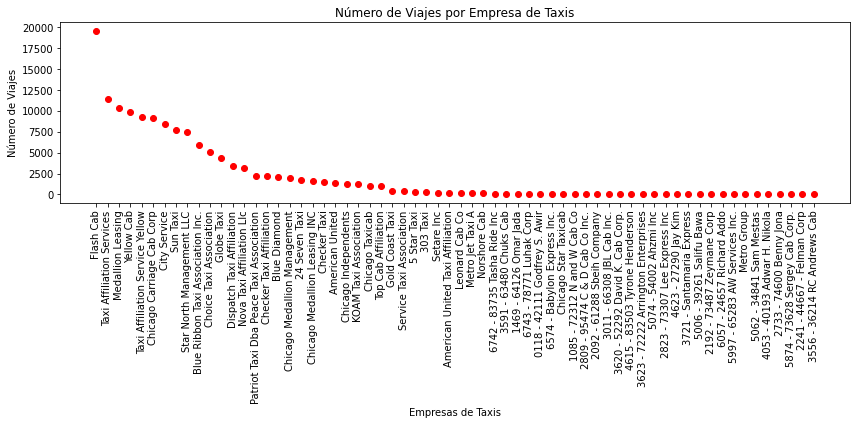

In [6]:
# Crear un gráfico de dispersión
plt.figure(figsize=(12, 6))
plt.scatter(company_names, trips_amount, color='red', marker='o')
plt.xlabel('Empresas de Taxis')
plt.ylabel('Número de Viajes')
plt.title('Número de Viajes por Empresa de Taxis')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor claridad
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# Lectura de datos del siguiente Dataframe

In [7]:
display(project_04.info())
display(project_04.head(10))

project_04.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


None

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


Se encuentra que no existen valores NaN y que los mismos son del tipo correspondiente para poder realizar un analisis mas adelante, se procedera a verificar y eliminar duplicados 

# VERIFICACION Y ELIMINACION DE DUPLICADOS 

In [8]:
# Buscar valores duplicados
duplicates_04 = project_04.duplicated()

# Mostrar las filas duplicadas
display("Filas duplicadas:")
display(project_04[duplicates_04])

# Eliminar los valores duplicados y actualizar el DataFrame
project_04_sin_duplicados = project_04.drop_duplicates()

# Verificar el nuevo DataFrame sin duplicados
display("DataFrame sin duplicados:")
display(project_04_sin_duplicados)


'Filas duplicadas:'

,dropoff_location_name,average_trips


'DataFrame sin duplicados:'

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


# ARREGLO DE DATOS 

In [9]:
project_04['average_trips'] = project_04['average_trips'].round(2)

In [10]:
display(project_04.info())
display(project_04.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


None

,dropoff_location_name,average_trips
0,Loop,10727.47
1,River North,9523.67
2,Streeterville,6664.67
3,West Loop,5163.67
4,O'Hare,2546.90


# Identificar los 10 principales barrios en términos de finalización del recorrido y tambien las 10 principales empresas

In [11]:
top_10_empresas = project_01.sort_values(by='trips_amount', ascending=False).head(10)

display(top_10_empresas)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


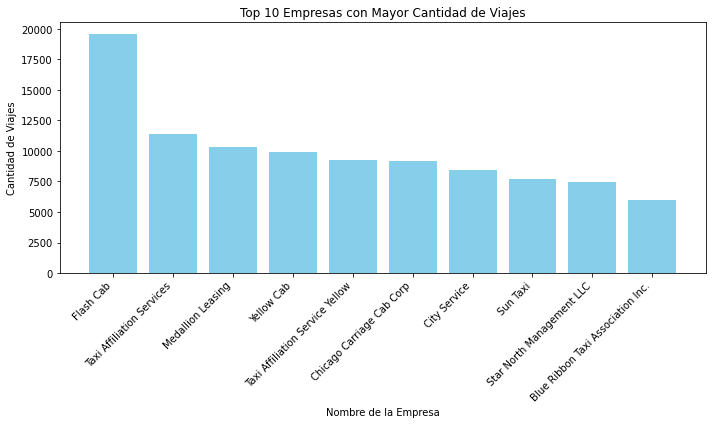

In [12]:
# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_10_empresas['company_name'], top_10_empresas['trips_amount'], color='skyblue')
plt.xlabel('Nombre de la Empresa')
plt.ylabel('Cantidad de Viajes')
plt.title('Top 10 Empresas con Mayor Cantidad de Viajes')
plt.xticks(rotation=45, ha='right')  # Rotar los nombres de las empresas para mejor visualización
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Se observa que Flash cab es la compañia que mas se usa para realizar viajes teniendo un total de casi 20000 viajes

In [13]:
top_10_barrios = project_04.sort_values(by='average_trips', ascending=False).head(10)

display(top_10_barrios)

,dropoff_location_name,average_trips
0,Loop,10727.47
1,River North,9523.67
2,Streeterville,6664.67
3,West Loop,5163.67
4,O'Hare,2546.90
5,Lake View,2420.97
6,Grant Park,2068.53
7,Museum Campus,1510.00
8,Gold Coast,1364.23
9,Sheffield & DePaul,1259.77


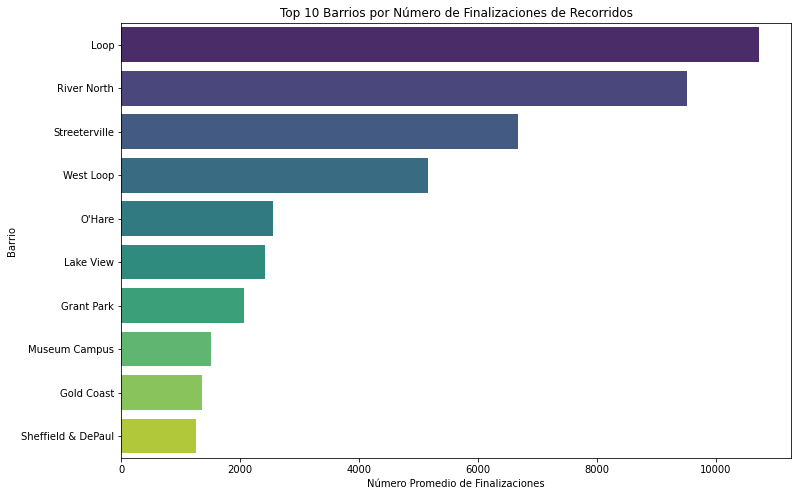

In [14]:
# Crea un gráfico de barras usando seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='average_trips', y='dropoff_location_name', data=top_10_barrios, palette='viridis')

# Personaliza el gráfico
plt.title('Top 10 Barrios por Número de Finalizaciones de Recorridos')
plt.xlabel('Número Promedio de Finalizaciones')
plt.ylabel('Barrio')

# Muestra el gráfico
plt.show()


Se observa que Loop y River North son los barrios en los que termina la mayor cantidad de viajes 

# LECTURA Y ARREGLO DE DATOS DE SIGUIENTE DATAFRAME

In [15]:
project_07['start_ts'] = pd.to_datetime(project_07['start_ts'])

# Crea una nueva columna 'day_of_week' que contiene el día de la semana
project_07['day_of_week'] = project_07['start_ts'].dt.day_name()

# Muestra el DataFrame resultante
display(project_07.info())
display(project_07.head())


project_07.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
 3   day_of_week         1068 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 33.5+ KB


None

,start_ts,weather_conditions,duration_seconds,day_of_week
0,2017-11-25 16:00:00,Good,2410.0,Saturday
1,2017-11-25 14:00:00,Good,1920.0,Saturday
2,2017-11-25 12:00:00,Good,1543.0,Saturday
3,2017-11-04 10:00:00,Good,2512.0,Saturday
4,2017-11-11 07:00:00,Good,1440.0,Saturday


,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


Se imprime resultados para verificar que no haya valores NaN y tambien se creo la columna para poder saber los dias de la semana y poder realizar un mejor analisis mas adelante 

# VERIFICACION Y ELIMICACION DE DUPLICADOS

In [16]:
# Verificar duplicados
duplicates_07 = project_07.duplicated()

# Mostrar las filas duplicadas
display("Filas duplicadas:")
display(project_07[duplicates_07])

# Eliminar duplicados y actualizar el DataFrame
project_07_sin_duplicados = project_07.drop_duplicates()

# Verificar el nuevo DataFrame sin duplicados
display("DataFrame sin duplicados:")
display(project_07_sin_duplicados)

'Filas duplicadas:'

,start_ts,weather_conditions,duration_seconds,day_of_week
62,2017-11-11 06:00:00,Good,1260.0,Saturday
74,2017-11-11 08:00:00,Good,1380.0,Saturday
76,2017-11-04 09:00:00,Good,1380.0,Saturday
117,2017-11-11 07:00:00,Good,1380.0,Saturday
119,2017-11-04 14:00:00,Good,3300.0,Saturday
...,...,...,...,...
1054,2017-11-11 07:00:00,Good,1380.0,Saturday
1058,2017-11-25 12:00:00,Good,1440.0,Saturday
1062,2017-11-11 06:00:00,Good,1500.0,Saturday
1065,2017-11-11 13:00:00,Good,2100.0,Saturday


'DataFrame sin duplicados:'

,start_ts,weather_conditions,duration_seconds,day_of_week
0,2017-11-25 16:00:00,Good,2410.0,Saturday
1,2017-11-25 14:00:00,Good,1920.0,Saturday
2,2017-11-25 12:00:00,Good,1543.0,Saturday
3,2017-11-04 10:00:00,Good,2512.0,Saturday
4,2017-11-11 07:00:00,Good,1440.0,Saturday
...,...,...,...,...
1060,2017-11-04 14:00:00,Good,2700.0,Saturday
1061,2017-11-18 16:00:00,Bad,2186.0,Saturday
1063,2017-11-25 11:00:00,Good,0.0,Saturday
1064,2017-11-11 10:00:00,Good,1318.0,Saturday


# PRUEBA DE HIPOTESIS 

# Hipotesis Nula:

 "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

# Hipotesis Alternativa:

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos".

In [17]:
#filtrar datos para obtener solo datos desde LOOP hasta aeropuerto O'HARE

dias_malos = project_07[(project_07['start_ts'].dt.day_name() == 'Saturday') & (project_07['weather_conditions'] == 'Bad')]

# Filtrar datos para días buenos (otros días)

dias_buenos = project_07[(project_07['start_ts'].dt.day_name() != 'Saturday') | (project_07['weather_conditions'] == 'Good')]


In [18]:
project_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
 3   day_of_week         1068 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 33.5+ KB


In [24]:
# Prueba levene 
_, p_levene = levene(dias_malos['duration_seconds'], dias_buenos['duration_seconds'])

if p_levene < 0.05:
    equal_var = False
    display("Las varianzas son diferentes.")
else:
    equal_var = True
    display("Las varianzas son iguales.")

'Las varianzas son iguales.'

In [25]:
t_statistic, p_value = ttest_ind(dias_malos['duration_seconds'], dias_buenos['duration_seconds'],equal_var=equal_var)

# Mostrar resultados
display(f'T-Statistic: {t_statistic}')
display(f'P-Value: {p_value}')

# Interpretar los resultados
if p_value < 0.05:
    display('Hay evidencia estadística para rechazar la hipótesis nula. Existen diferencias significativas.')
else:
    display('No hay suficiente evidencia estadística para rechazar la hipótesis nula. No hay diferencias significativas.')

'T-Statistic: 6.946177714041499'

'P-Value: 6.517970327099473e-12'

'Hay evidencia estadística para rechazar la hipótesis nula. Existen diferencias significativas.'

In [21]:
average_duration_rainy_saturdays = dias_malos['duration_seconds'].mean()


In [22]:
# alpha 0.05
alpha = 0.05

# Realiza la prueba t
t_statistic, p_value = stats.ttest_1samp(dias_malos['duration_seconds'], project_07['duration_seconds'].mean())

# Comparacion de valor p con alpha para determinar la significancia
if p_value < alpha:
    display(f"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia significativamente los sábados lluviosos (p-value: {p_value})")
else:
    display(f"No hay evidencia suficiente para afirmar que la duración promedio de los viajes cambia en los sábados lluviosos (p-value: {p_value})")


"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia significativamente los sábados lluviosos (p-value: 4.224120813822628e-10)"

In [23]:
# Extraer el día de la semana
project_07['day_of_week'] = project_07['start_ts'].dt.day_name()

# Filtrar los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare
filtered_data = project_07[project_07['day_of_week'] == 'Saturday']
filtered_data = filtered_data[filtered_data['weather_conditions'] == 'Bad']

# Combinar con la información de destinos
merged_data = pd.merge(filtered_data, project_04, left_on='weather_conditions', right_on='dropoff_location_name', how='left')

# Realizar la prueba de hipótesis
alpha = 0.05
t_statistic, p_value = stats.ttest_1samp(merged_data['duration_seconds'], project_07['duration_seconds'].mean())

# Comprobar la significancia
if p_value < alpha:
    display(f"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia significativamente en sábados lluviosos (p-value: {p_value})")
else:
    display(f"No hay evidencia suficiente para afirmar que la duración promedio de los viajes cambia en sábados lluviosos (p-value: {p_value})")


"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia significativamente en sábados lluviosos (p-value: 4.224120813822628e-10)"

Al observar ambas pruebas se verifica que si existe una diferencia en los viajes que se realizan desde Loop hasta el aeropuerto en los dias sabados lluviosos, por lo tanto la hipotesis nula es aceptada.

# Conclusion general 

Se realizó un analisis sobre las diferentes compañias de taxis en la ciudad de Chicago asi como los viajes que estas realizaron a los diferentes barrios de la ciudad durante el mes de noviembre de 2017, ademas se analizó el numero de viajes realizados entre el 15 y 26 de noviembre del mismo año, a continuacion se detalla un resumen de lo realizado:
1. Se cargó toda la informacion desde los datasets entregados. 
2. Se reviso a simple vista y busco por errores en los datos y de haberlos encontrados se corrigieron para un mejor analisis. 
3. Se realizo un analisis tanto de las compañias de taxis que mas se usaron como de los destinos mas frecuentes y se verifico mediante graficos de barras, se encontro lo siguiente: De las compañias de taxis que mas se utilizan se observo que la mas usada es Flash Cab. Asi mismo se analisó en que barrios terminan con mas frecuencia los viajes y Loop es el lugar donde terminaron muchos mas viajes.
4. Por ultimo se reviso la hipotesis nula y al analizar si hay un cambio en los viajes en dias sabados lluviosos desde Loop hacia el Aeropuerto se observo que bajo esa condicion climatica hay un cambio significativo por lo que se acepto la hipotesis nula.